# Candlestick Charts using Matplotlib | Python

<img src="candlestick_chart.png"/>

In [1]:
import matplotlib

print("Matplotlib Version : {}".format(matplotlib.__version__))

Matplotlib Version : 3.9.2


In [2]:
import pandas as pd

# Chargement des données EUR/USD
eurusd_df = pd.read_csv("/home/ab/Downloads/EURUSD_Daily_200001030000_201912310000.csv", index_col=0, parse_dates=True)

# Réinitialisation de l'index pour faciliter l'accès aux colonnes
eurusd_df = eurusd_df.reset_index()

# Affichage des premières lignes pour vérifier la structure des données
eurusd_df.head()

,Date,Open,High,Low,Close,Tickvol,Vol,Spread
0,2000-01-03,1.0073,1.0278,1.0054,1.0246,6642,0,50
1,2000-01-04,1.0243,1.0340,1.0213,1.0292,7339,0,50
2,2000-01-05,1.0293,1.0402,1.0284,1.0326,6570,0,50
3,2000-01-06,1.0325,1.0415,1.0272,1.0330,7223,0,50
4,2000-01-07,1.0329,1.0332,1.0260,1.0298,5689,0,50


In [3]:
# Sélectionner les 30 dernières lignes des données EUR/USD
eurusd_df_small = eurusd_df[-30:]

# Afficher les 30 dernières lignes
eurusd_df_small

,Date,Open,High,Low,Close,Tickvol,Vol,Spread
5169,2019-11-19,1.10718,1.10838,1.10624,1.10780,26644,0,1
5170,2019-11-20,1.10777,1.10813,1.10530,1.10723,34131,0,1
5171,2019-11-21,1.10723,1.10969,1.10521,1.10581,31829,0,1
5172,2019-11-22,1.10580,1.10875,1.10144,1.10182,32645,0,1
5173,2019-11-25,1.10151,1.10320,1.10035,1.10126,27995,0,1
5174,2019-11-26,1.10129,1.10255,1.10072,1.10194,28638,0,1
5175,2019-11-27,1.10194,1.10246,1.09923,1.09989,29482,0,1
5176,2019-11-28,1.09987,1.10178,1.09986,1.10075,20746,0,1
5177,2019-11-29,1.10071,1.10282,1.09810,1.10152,27604,0,1
5178,2019-12-02,1.10241,1.10910,1.10029,1.10784,31480,0,1


In [4]:
# Sélectionner les bougies "vertes" (Close > Open)
green_df = eurusd_df_small[eurusd_df_small.Close > eurusd_df_small.Open].copy()
green_df["Height"] = green_df["Close"] - green_df["Open"]

# Sélectionner les bougies "rouges" (Close < Open)
red_df = eurusd_df_small[eurusd_df_small.Close < eurusd_df_small.Open].copy()
red_df["Height"] = red_df["Open"] - red_df["Close"]

In [5]:
green_df.head()

,Date,Open,High,Low,Close,Tickvol,Vol,Spread,Height
5169,2019-11-19,1.10718,1.10838,1.10624,1.10780,26644,0,1,0.00062
5174,2019-11-26,1.10129,1.10255,1.10072,1.10194,28638,0,1,0.00065
5176,2019-11-28,1.09987,1.10178,1.09986,1.10075,20746,0,1,0.00088
5177,2019-11-29,1.10071,1.10282,1.09810,1.10152,27604,0,1,0.00081
5178,2019-12-02,1.10241,1.10910,1.10029,1.10784,31480,0,1,0.00543


In [6]:
red_df.head()

,Date,Open,High,Low,Close,Tickvol,Vol,Spread,Height
5170,2019-11-20,1.10777,1.10813,1.10530,1.10723,34131,0,1,0.00054
5171,2019-11-21,1.10723,1.10969,1.10521,1.10581,31829,0,1,0.00142
5172,2019-11-22,1.10580,1.10875,1.10144,1.10182,32645,0,1,0.00398
5173,2019-11-25,1.10151,1.10320,1.10035,1.10126,27995,0,1,0.00025
5175,2019-11-27,1.10194,1.10246,1.09923,1.09989,29482,0,1,0.00205


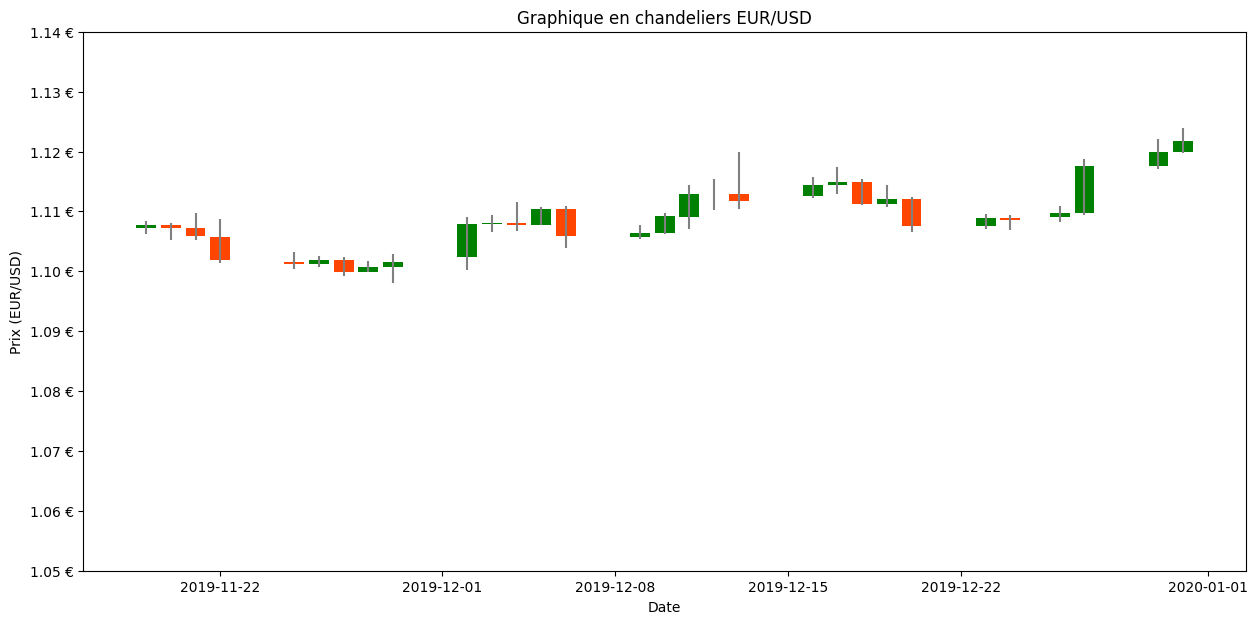

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Créer la figure pour afficher le graphique
fig = plt.figure(figsize=(15, 7))

## Lignes grises pour les valeurs min et max
plt.vlines(x=eurusd_df_small["Date"], ymin=eurusd_df_small["Low"], ymax=eurusd_df_small["High"],
           color="grey")

## Bougies vertes (Close > Open)
plt.bar(x=green_df["Date"], height=green_df["Height"], bottom=green_df["Open"], color="green")

## Bougies rouges (Close < Open)
plt.bar(x=red_df["Date"], height=red_df["Height"], bottom=red_df["Close"], color="orangered")

# Personnalisation des ticks de l'axe Y avec des valeurs en euros
plt.yticks(np.arange(1.05, 1.15, 0.01), ["{:.2f} €".format(v) for v in np.arange(1.05, 1.15, 0.01)])

# Titres et étiquettes
plt.xlabel("Date")
plt.ylabel("Prix (EUR/USD)")
plt.title("Graphique en chandeliers EUR/USD")

# Affichage du graphique
plt.show()

In [8]:
plt.style.use("fivethirtyeight");

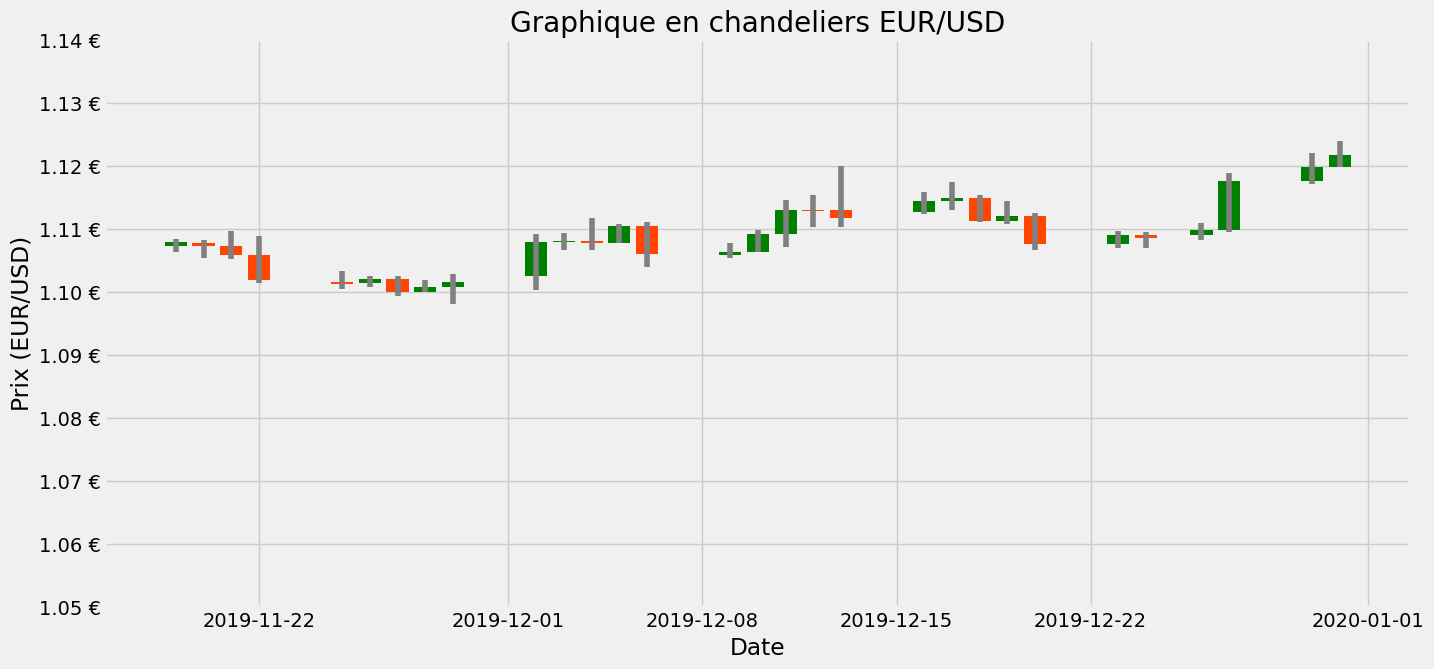

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Créer la figure pour afficher le graphique
fig = plt.figure(figsize=(15, 7))

## Lignes grises pour les valeurs min et max
plt.vlines(x=eurusd_df_small["Date"], ymin=eurusd_df_small["Low"], ymax=eurusd_df_small["High"],
           color="grey")

## Bougies vertes (Close > Open)
plt.bar(x=green_df["Date"], height=green_df["Height"], bottom=green_df["Open"], color="green")

## Bougies rouges (Close < Open)
plt.bar(x=red_df["Date"], height=red_df["Height"], bottom=red_df["Close"], color="orangered")

# Personnalisation des ticks de l'axe Y avec des valeurs en EUR/USD
plt.yticks(np.arange(1.05, 1.15, 0.01), ["{:.2f} €".format(v) for v in np.arange(1.05, 1.15, 0.01)])

# Titres et étiquettes
plt.xlabel("Date")
plt.ylabel("Prix (EUR/USD)")
plt.title("Graphique en chandeliers EUR/USD")

# Affichage du graphique
plt.show()

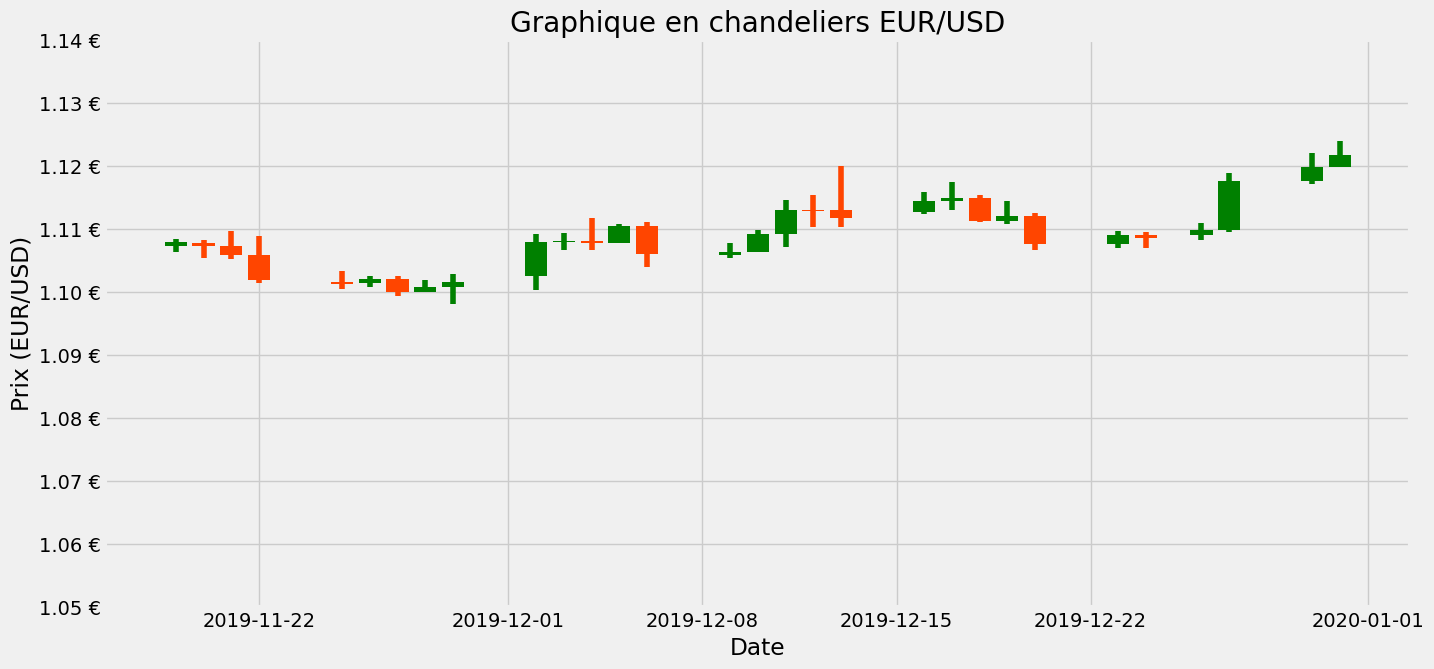

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Créer la figure pour afficher le graphique
fig = plt.figure(figsize=(15, 7))

## Lignes grises pour les valeurs min et max
plt.vlines(x=green_df["Date"], ymin=green_df["Low"], ymax=green_df["High"],
           color="green")
plt.vlines(x=red_df["Date"], ymin=red_df["Low"], ymax=red_df["High"],
           color="orangered")

## Bougies vertes (Close > Open)
plt.bar(x=green_df["Date"], height=green_df["Height"], bottom=green_df["Open"], color="green")

## Bougies rouges (Close < Open)
plt.bar(x=red_df["Date"], height=red_df["Height"], bottom=red_df["Close"], color="orangered")

# Personnalisation des ticks de l'axe Y avec des valeurs en EUR/USD
plt.yticks(np.arange(1.05, 1.15, 0.01), ["{:.2f} €".format(v) for v in np.arange(1.05, 1.15, 0.01)])

# Titres et étiquettes
plt.xlabel("Date")
plt.ylabel("Prix (EUR/USD)")
plt.title("Graphique en chandeliers EUR/USD")

# Affichage du graphique
plt.show()

### CandleStick with Volume

In [11]:
import numpy as np

np.arange(9).reshape(3,3)

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

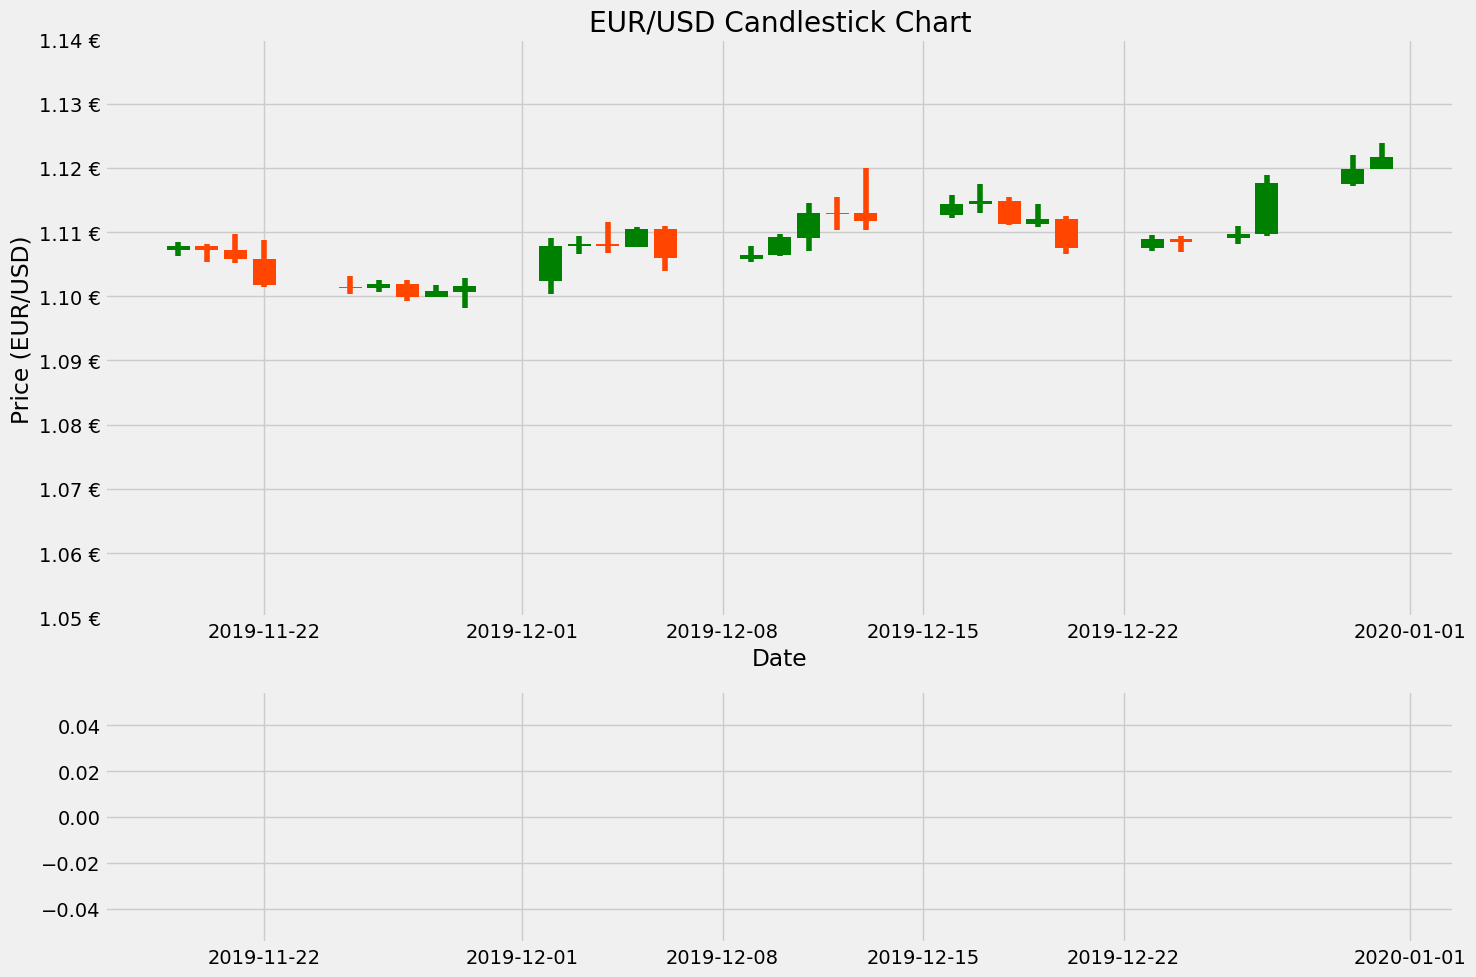

In [12]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import numpy as np

grid = GridSpec(3,3)

fig = plt.figure(figsize=(15,10))

ax1 = fig.add_subplot(grid[:2, :])

## Lignes grises pour les valeurs min et max
plt.vlines(x=green_df["Date"], ymin=green_df["Low"], ymax=green_df["High"],
           color="green")
plt.vlines(x=red_df["Date"], ymin=red_df["Low"], ymax=red_df["High"],
           color="orangered")

## Bougies vertes (Close > Open)
plt.bar(x=green_df["Date"], height=green_df["Height"], bottom=green_df["Open"], color="green")

## Bougies rouges (Close < Open)
plt.bar(x=red_df["Date"], height=red_df["Height"], bottom=red_df["Close"], color="orangered")

# Personnalisation des ticks de l'axe Y avec des valeurs en EUR/USD
plt.yticks(np.arange(1.05, 1.15, 0.01), ["{:.2f} €".format(v) for v in np.arange(1.05, 1.15, 0.01)])

plt.xlabel("Date")
plt.ylabel("Price (EUR/USD)")
plt.title("EUR/USD Candlestick Chart")

ax2 = fig.add_subplot(grid[2, :])

# Affichage des volumes
plt.bar(x=eurusd_df_small["Date"], height=eurusd_df_small["Vol"], color="dodgerblue")

plt.tight_layout()


### Mplfinance

In [13]:
import mplfinance

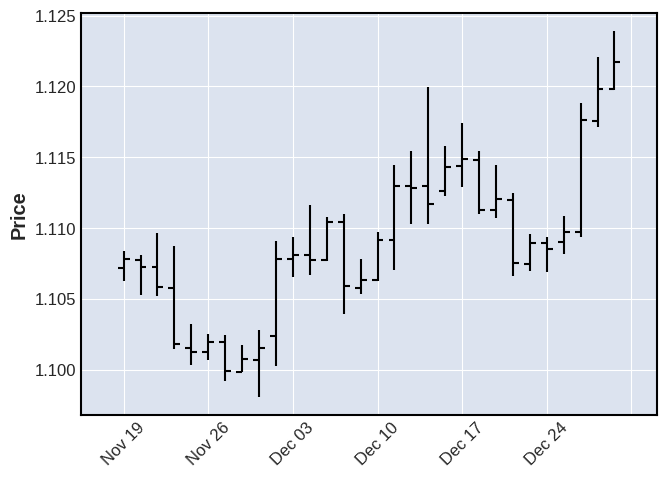

In [14]:
mplfinance.plot(eurusd_df_small.set_index("Date"))

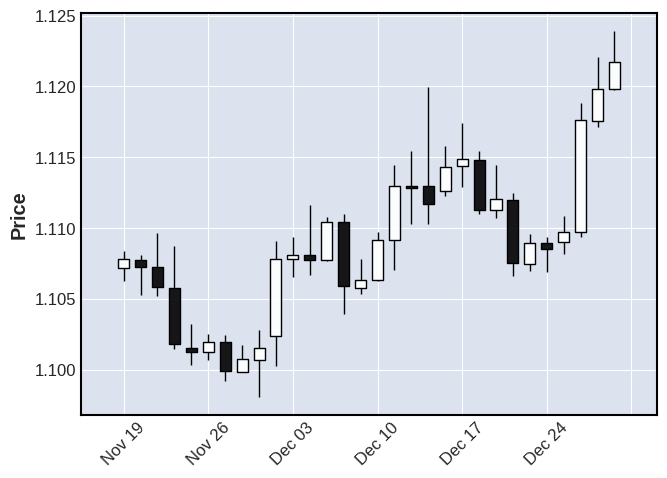

In [15]:
mplfinance.plot(eurusd_df_small.set_index("Date"), type="candle")

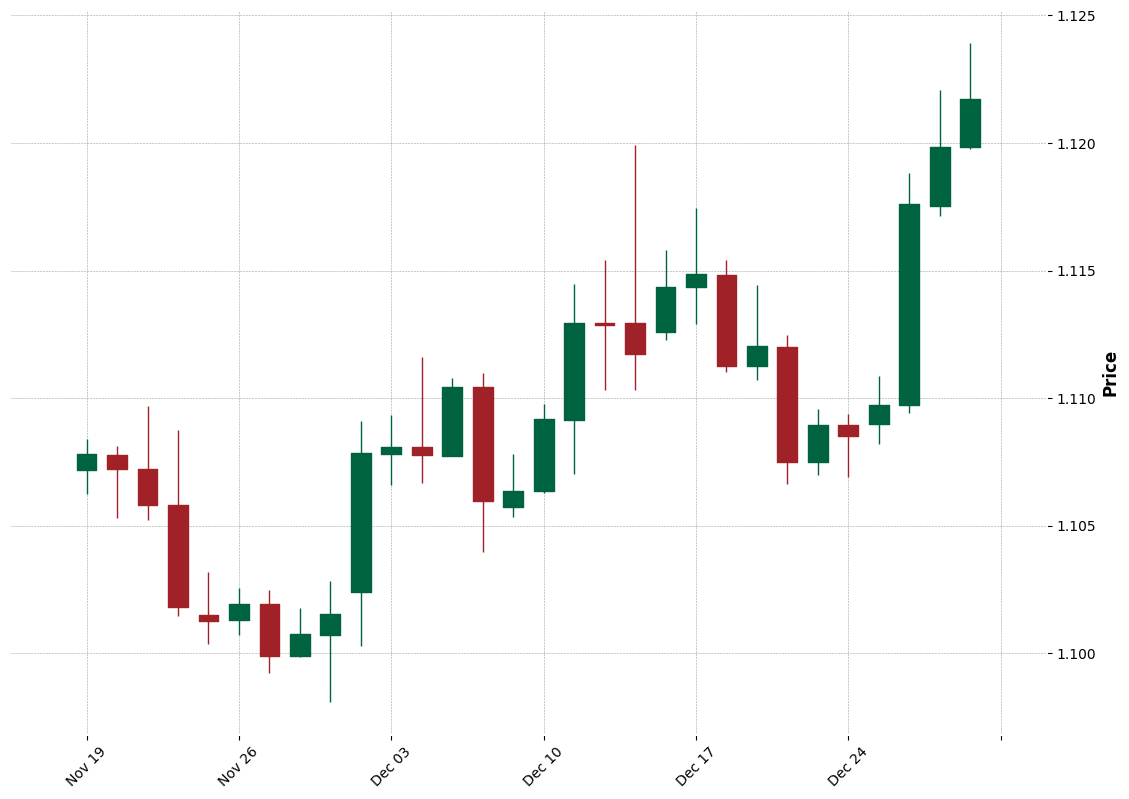

In [16]:
mplfinance.plot(eurusd_df_small.set_index("Date"), type="candle", style="charles", figscale=1.8)

## Summary

Visit **[CoderzColumn](https://coderzcolumn.com)** for More Guidance on Candlestick Charts.

In [17]:
#plt.yticks(np.arange(1.05, 1.15, 0.01), ["{:.2f} €".format(v) for v in np.arange(1.05, 1.15, 0.01)])
#plt.yticks(range(1.05, 1.15, 0.01), ["{:.2f} €".format(v) for v in range(105, 115)])  # Adjust based on EUR/USD range

In [18]:
# Engulfing pattern signals
def Revsignal1(df):
    length = len(df)
    high = list(df['High'])
    low = list(df['Low'])
    close = list(df['Close'])
    open = list(df['Open'])
    signal = [0] * length
    bodydiff = [0] * length

    for row in range(1, length):
        bodydiff[row] = abs(open[row] - close[row])
        bodydiffmin = 0.0003  # Seuil pour EUR/USD (valeurs typiques plus petites)
        # Détection des signaux "bearish engulfing"
        if (bodydiff[row] > bodydiffmin and bodydiff[row-1] > bodydiffmin and
            open[row-1] < close[row-1] and
            open[row] > close[row] and 
            (open[row] - close[row-1]) >= 0 and close[row] < open[row-1]):
            signal[row] = 1  # Bearish engulfing
        # Détection des signaux "bullish engulfing"
        elif (bodydiff[row] > bodydiffmin and bodydiff[row-1] > bodydiffmin and
              open[row-1] > close[row-1] and
              open[row] < close[row] and 
              (open[row] - close[row-1]) <= 0 and close[row] > open[row-1]):
            signal[row] = 2  # Bullish engulfing
        else:
            signal[row] = 0  # Aucun signal

    return signal

# Ajout des signaux dans eurusd_df
eurusd_df['Signal'] = Revsignal1(eurusd_df)

# Compte des signaux détectés
bearish_count = eurusd_df[eurusd_df['Signal'] == 1].count()
bullish_count = eurusd_df[eurusd_df['Signal'] == 2].count()

print("Nombre de signaux Bearish Engulfing :", bearish_count)
print("Nombre de signaux Bullish Engulfing :", bullish_count)


Nombre de signaux Bearish Engulfing : Date       327
Open       327
High       327
Low        327
Close      327
Tickvol    327
Vol        327
Spread     327
Signal     327
dtype: int64
Nombre de signaux Bullish Engulfing : Date       352
Open       352
High       352
Low        352
Close      352
Tickvol    352
Vol        352
Spread     352
Signal     352
dtype: int64
